In [116]:
%pylab inline

from sklearn.datasets import load_boston, load_digits
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Activation, BatchNormalization, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy import stats

from pprint import pprint as pp

Populating the interactive namespace from numpy and matplotlib


In [128]:
boston = load_boston()
data = np.random.rand(boston.data.shape[0], boston.data.shape[1] * 5)

correct_indices = []
random_indices = np.arange(65)
for i in range(boston.data.shape[1]):
    data[:, i*5+1] *= i
    data[:, i*5+2] **= 2 + i
    data[:, i*5+4] += i
    data[:, i*5] = boston.data[:, i]
    correct_indices.append(i*5)

correct_indices = np.array(correct_indices) 
random_indices = list(set(random_indices) - set(correct_indices))
random_indices.sort()

train_x, test_x, train_y, test_y = train_test_split(data, 
                                                    boston.target.reshape(-1, 1),
                                                    test_size=0.3)

print('Random Indices:', random_indices)
print('Correct Indices:', correct_indices)
print('train x:', train_x.shape)
print('train y:', train_y.shape)

Random Indices: [1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 51, 52, 53, 54, 56, 57, 58, 59, 61, 62, 63, 64]
Correct Indices: [ 0  5 10 15 20 25 30 35 40 45 50 55 60]
train x: (354, 65)
train y: (354, 1)


# Pearson Correlation

[60]   0.7414 [Correct]
[25]   0.7239 [Correct]
[50]   0.5256 [Correct]
[10]   0.5101 [Correct]
[45]   0.4856 [Correct]
[20]    0.428 [Correct]
[5 ]    0.389 [Correct]
[0 ]   0.3848 [Correct]
[40]   0.3843 [Correct]
[30]   0.3702 [Correct]
[55]   0.3175 [Correct]
[35]   0.2454 [Correct]
[15]   0.2077 [Correct]
[28]   0.1319
[19]   0.1314
[31]   0.1018
[52]  0.09819
[56]  0.09702
[6 ]  0.09125
[38]  0.08533
[24]  0.08199
[59]  0.07717
[16]   0.0689
[64]  0.06848
[11]  0.06776
[7 ]  0.06612
[41]  0.06077
[26]  0.06061
[13]  0.05544
[61]  0.05409
[3 ]  0.05379
[47]  0.05287
[62]  0.05188
[42]  0.05113
[63]  0.04881
[57]  0.04368
[37]  0.04273
[2 ]  0.03951
[12]  0.03878
[32]  0.03588
[8 ]  0.03559
[9 ]  0.03199
[48]  0.02863
[1 ]  0.02846
[36]  0.02822
[14]  0.02779
[54]  0.02743
[34]  0.02674
[29]  0.02588
[18]  0.02481
[22]  0.02464
[43]  0.02424
[51]  0.02422
[49]    0.022
[39]  0.01938
[53]  0.01915
[27]  0.01658
[58]  0.01625
[23]  0.01515
[46]  0.01485
[4 ]  0.01292
[17]  0.01179
[4

<Container object of 52 artists>

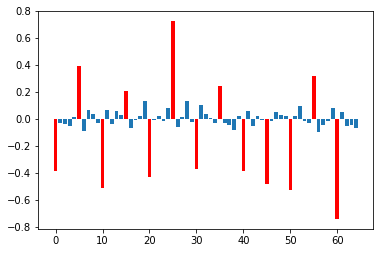

In [4]:
# Calculate Pearson Correlation
correlations = []
for i in range(train_x.shape[1]):
    c = np.corrcoef(train_x[:, i], train_y.reshape(-1))[0, 1]
    t = stats.ttest_1samp(train_y.reshape(-1), c)
    correlations.append((i, c))
correlations = np.array(correlations)


sorted_corrs = sorted(correlations, key=lambda x: -abs(x[1]))
for i, c in  sorted_corrs:
    i = int(i)
    c = abs(c)
    if i in correct_indices:
        print(f'[{i:<2}] {c:8.4} [Correct]')
    else:
        print(f'[{i:<2}] {c:8.4}')

bar(correct_indices, correlations[:, 1][correct_indices], color='red')
bar(random_indices, correlations[:, 1][random_indices])

# Tools

In [9]:
def show_result(y_true, y_pred, sample=30):
    print('R^2:', r2_score(y_true, y_pred))
    print('MSE:', mean_squared_error(y_true, y_pred))
    n = y_pred.shape[0]
    
    fig, plots = subplots(2, 2)
    plots = plots.reshape(-1)
    for p  in plots:
        idx = np.random.randint(0, n-sample)
    
        p.plot(y_true[idx: idx+sample])
        p.plot(y_pred[idx: idx+sample], color='red')

# Lasso Regression

R^2: 0.600629398728
MSE: 28.1705538313


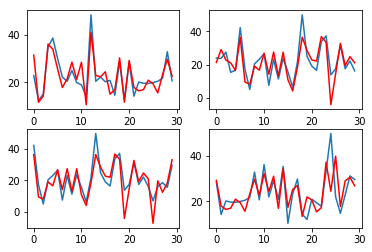

In [85]:
lasso = Lasso(alpha=0.01)
lasso.fit(train_x, train_y)
pred_y = lasso.predict(test_x)

show_result(test_y, pred_y)

<Container object of 52 artists>

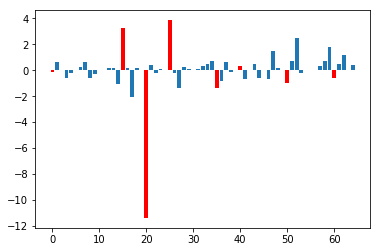

In [280]:
bar(correct_indices, lasso.coef_[correct_indices], color='red')
bar(random_indices, lasso.coef_[random_indices])

# Ridge Regression

R^2: 0.599493450941
MSE: 30.9553007773


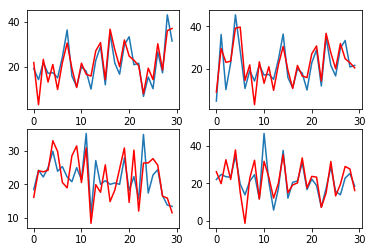

In [260]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_x, train_y)
pred_y = ridge.predict(test_x)

show_result(test_y, pred_y)

[]

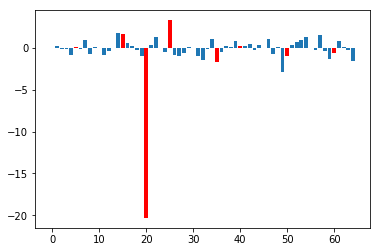

In [265]:
coef = ridge.coef_[0]
bar(correct_indices, coef[correct_indices], color='red')
bar(random_indices, coef[random_indices])
plot()

# Convolution Neural Network

In [6]:
# Scalers
scaler = MinMaxScaler()
scaler.fit(data)
target_scaler = MinMaxScaler()
target_scaler.fit(boston.target.reshape(-1, 1))

# Scaling
dl_train_x = scaler.transform(train_x).reshape(-1, 65, 1)
dl_train_y = target_scaler.transform(train_y)
dl_test_x = scaler.transform(test_x).reshape(-1, 65, 1)
dl_test_y = target_scaler.transform(test_y)

R^2: 0.45001323597
MSE: 0.019208308776


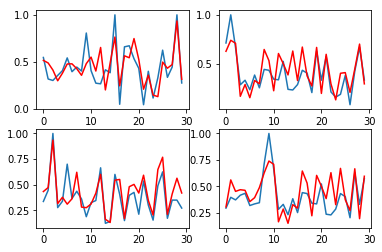

In [239]:
cnn = Sequential()
cnn.add(Conv1D(filters=256, kernel_size=12, strides=1, input_shape=(65, 1), activation='relu'))
cnn.add(Conv1D(filters=156, kernel_size=6, strides=1, activation='relu'))
cnn.add(Conv1D(filters=97, kernel_size=5, strides=1, activation='relu'))
cnn.add(Conv1D(filters=64, kernel_size=4, strides=1, activation='relu'))
cnn.add(Conv1D(filters=32, kernel_size=3, strides=1, activation='relu'))
cnn.add(Conv1D(filters=32, kernel_size=2, strides=1, activation='relu'))
cnn.add(Conv1D(filters=16, kernel_size=1, strides=1, activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(1, activation='sigmoid'))
cnn.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])

cnn.fit(dl_train_x, dl_train_y, verbose=0, epochs=500)
dl_pred_y = cnn.predict(dl_test_x).reshape(-1, 1)

show_result(dl_test_y, dl_pred_y)

# Deep Neural Network

In [7]:
dl_train_x = dl_train_x.reshape(-1, 65)
dl_test_x = dl_test_x.reshape(-1, 65)

R^2: 0.73244442359
MSE: 0.00934438874269


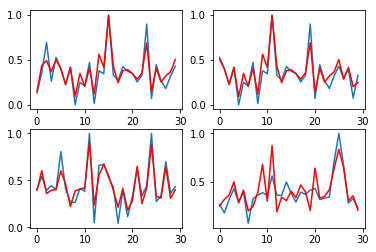

In [198]:
dnn = Sequential()
dnn.add(Dense(512, batch_input_shape=(None, 65)))
dnn.add(Activation('relu'))

dnn.add(Dense(512))
dnn.add(Activation('relu'))

dnn.add(Dense(456))
dnn.add(Activation('relu'))

dnn.add(Dense(345))
dnn.add(Activation('relu'))

dnn.add(Dense(256))
dnn.add(Activation('relu'))

dnn.add(Dense(128))
dnn.add(Activation('relu'))

dnn.add(Dense(128))
dnn.add(Activation('relu'))

dnn.add(Dense(64))
dnn.add(Activation('relu'))

dnn.add(Dense(1, activation='sigmoid'))
dnn.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])

dnn.fit(dl_train_x, dl_train_y, verbose=0, epochs=200)
pred_y = dnn.predict(dl_test_x).reshape(-1, 1)

show_result(dl_test_y, pred_y)

In [139]:
def create_model(seed=0, w1=256, w2=172, w3=128, w4=64, dout1=0.3, dout2=0.3, dout3=0.1):
    print(f'[Created Model] seed={seed}, w1={w1}, w2={w2}, w3={w3}, w4={w4}, '
          f'dout1={dout1}, dout2={dout2}, dout3={dout3}')
    np.random.seed(seed)
    dnn = Sequential()
    dnn.add(Dense(w1, batch_input_shape=(None, 65)))
    dnn.add(BatchNormalization())
    dnn.add(LeakyReLU())
    if dout1:
        dnn.add(Dropout(dout1))

    dnn.add(Dense(w2))
    dnn.add(LeakyReLU())
    if dout2:
        dnn.add(Dropout(dout2))

    dnn.add(Dense(w3))
    dnn.add(LeakyReLU())
    if dout3:
        dnn.add(Dropout(dout3))
    
    dnn.add(Dense(w4))
    dnn.add(LeakyReLU())

    dnn.add(Dense(1, activation='sigmoid'))
    dnn.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])
    return dnn

# Custom Scorer
def custom_accuracy(y_true, y_pred):
    y_true = y_true.reshape((-1, 1))
    y_pred = y_pred.reshape((-1, 1))
    score = r2_score(y_true, y_pred, multioutput='variance_weighted')
    mse = ((y_true - y_pred)**2).mean()
#     print(f'mse:{mse}, r^2:{score}')
    return score

params = dict(seed=[0, 3, 5, 7, 10, 13, 15, 20],
              w1=[512, 384, 256],
              w2=[256, 172, 128],
              w3=[256, 128],
              w4=[128, 64],
              dout1=[0.5, 0.4, 0.3, None],
              dout2=[0.4, 0.3, 0.2, None],
              dout3=[0.2, 0.1, None], 
              epochs=[30, 150, 200, 400])

classifier = KerasRegressor(create_model, verbose=0)
scorer = make_scorer(custom_accuracy, greater_is_better=True)
search = RandomizedSearchCV(classifier, param_distributions=params, scoring=scorer, n_jobs=1, n_iter=5)
search_result = search.fit(dl_train_x, dl_train_y)

# dnn = create_model()
# early_stopping = EarlyStopping(monitor='acc', patience=2)
# history = dnn.fit(dl_train_x, dl_train_y, 
#                   verbose=2, 
#                   epochs=1000)
# #                   validation_data=(dl_test_x, dl_test_y),
# #                   callbacks=[early_stopping])
# pred_y = dnn.predict(dl_test_x).reshape(-1, 1)

# show_result(dl_test_y, pred_y)
# print('Epoch:', len(history.epoch))

[Created Model] seed=3, w1=384, w2=172, w3=256, w4=64, dout1=None, dout2=None, dout3=0.2
[Created Model] seed=3, w1=384, w2=172, w3=256, w4=64, dout1=None, dout2=None, dout3=0.2
[Created Model] seed=3, w1=384, w2=172, w3=256, w4=64, dout1=None, dout2=None, dout3=0.2
[Created Model] seed=20, w1=512, w2=128, w3=256, w4=64, dout1=0.4, dout2=None, dout3=0.2
[Created Model] seed=20, w1=512, w2=128, w3=256, w4=64, dout1=0.4, dout2=None, dout3=0.2
[Created Model] seed=20, w1=512, w2=128, w3=256, w4=64, dout1=0.4, dout2=None, dout3=0.2
[Created Model] seed=7, w1=512, w2=172, w3=256, w4=128, dout1=None, dout2=None, dout3=0.1
[Created Model] seed=7, w1=512, w2=172, w3=256, w4=128, dout1=None, dout2=None, dout3=0.1
[Created Model] seed=7, w1=512, w2=172, w3=256, w4=128, dout1=None, dout2=None, dout3=0.1
[Created Model] seed=20, w1=512, w2=256, w3=256, w4=128, dout1=None, dout2=0.4, dout3=0.2
[Created Model] seed=20, w1=512, w2=256, w3=256, w4=128, dout1=None, dout2=0.4, dout3=0.2
[Created Model] 

In [157]:
_mean_scores = search_result.cv_results_['mean_test_score']
_stds = search_result.cv_results_['std_test_score']
_params = search_result.cv_results_['params']

print('[Best]')
print('Best Score:', search_result.best_score_)
pp(search_result.best_params_)
print()
for mean, std, param in zip(_mean_scores, _stds, _params):
    print(f'mean:{mean:.7},\tstd:{std:.5}')
    pp(params)
    print()

[Best]
Best Score: 0.687651456495
{'dout1': None,
 'dout2': 0.4,
 'dout3': 0.2,
 'epochs': 200,
 'seed': 20,
 'w1': 512,
 'w2': 256,
 'w3': 256,
 'w4': 128}

mean:0.562068,	std:0.05204
{'dout1': None,
 'dout2': 0.4,
 'dout3': 0.2,
 'seed': 20,
 'w1': 512,
 'w2': 256,
 'w3': 256,
 'w4': 128}

mean:0.6083338,	std:0.052337
{'dout1': None,
 'dout2': 0.4,
 'dout3': 0.2,
 'seed': 20,
 'w1': 512,
 'w2': 256,
 'w3': 256,
 'w4': 128}

mean:0.5949061,	std:0.044422
{'dout1': None,
 'dout2': 0.4,
 'dout3': 0.2,
 'seed': 20,
 'w1': 512,
 'w2': 256,
 'w3': 256,
 'w4': 128}

mean:0.6876515,	std:0.036894
{'dout1': None,
 'dout2': 0.4,
 'dout3': 0.2,
 'seed': 20,
 'w1': 512,
 'w2': 256,
 'w3': 256,
 'w4': 128}

mean:0.6813207,	std:0.034005
{'dout1': None,
 'dout2': 0.4,
 'dout3': 0.2,
 'seed': 20,
 'w1': 512,
 'w2': 256,
 'w3': 256,
 'w4': 128}



[Created Model] seed=20, w1=512, w2=256, w3=256, w4=128, dout1=None, dout2=0.4, dout3=0.2
Epoch 1/200
13s - loss: 0.0447 - acc: 0.0198
Epoch 2/200
0s - loss: 0.0233 - acc: 0.0395
Epoch 3/200
0s - loss: 0.0198 - acc: 0.0367
Epoch 4/200
0s - loss: 0.0157 - acc: 0.0424
Epoch 5/200
0s - loss: 0.0156 - acc: 0.0424
Epoch 6/200
0s - loss: 0.0133 - acc: 0.0395
Epoch 7/200
0s - loss: 0.0094 - acc: 0.0424
Epoch 8/200
0s - loss: 0.0102 - acc: 0.0424
Epoch 9/200
0s - loss: 0.0088 - acc: 0.0424
Epoch 10/200
0s - loss: 0.0101 - acc: 0.0424
Epoch 11/200
0s - loss: 0.0088 - acc: 0.0424
Epoch 12/200
0s - loss: 0.0087 - acc: 0.0424
Epoch 13/200
0s - loss: 0.0090 - acc: 0.0424
Epoch 14/200
0s - loss: 0.0075 - acc: 0.0424
Epoch 15/200
0s - loss: 0.0079 - acc: 0.0424
Epoch 16/200
0s - loss: 0.0099 - acc: 0.0424
Epoch 17/200
0s - loss: 0.0061 - acc: 0.0424
Epoch 18/200
0s - loss: 0.0056 - acc: 0.0424
Epoch 19/200
0s - loss: 0.0049 - acc: 0.0424
Epoch 20/200
0s - loss: 0.0057 - acc: 0.0424
Epoch 21/200
0s - 

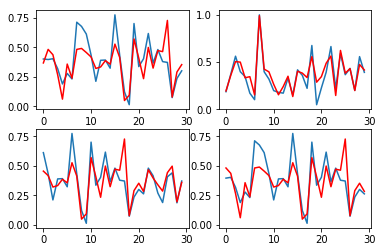

In [146]:
params = search_result.best_params_.copy()
del params['epochs']
dnn = create_model(**params)
history = dnn.fit(dl_train_x, dl_train_y, verbose=2, epochs=search_result.best_params_['epochs'])
pred_y = dnn.predict(dl_test_x).reshape(-1, 1)

show_result(dl_test_y, pred_y)
print('Epoch:', len(history.epoch))

R^2: 0.590900933861
MSE: 0.0126748420211
Epoch: 200


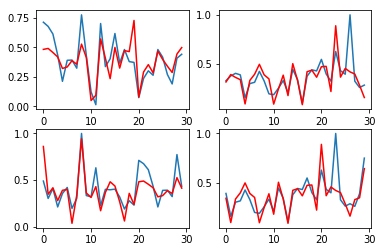

In [152]:
show_result(dl_test_y, pred_y)
print('Epoch:', len(history.epoch))